In [2]:
import pandas as pd
data1 = pd.read_csv("train.csv",index_col="Id")
data2 = pd.read_csv("test.csv",index_col="Id")
data3 = pd.read_csv("sample_submission.csv",index_col="Id")
data4 = data2.merge(data3,left_index=True,right_index=True)
data = pd.concat([data1, data4], axis=1)
print(data.columns)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object', length=160)


In [3]:
import numpy as np
print("Null values in each column:\n", data.isnull().sum())
data_numeric = data.select_dtypes(include=[np.number])
data_cleaned = data_numeric.fillna(data_numeric.mean())

Null values in each column:
 MSSubClass       1459
MSZoning         1459
LotFrontage      1718
LotArea          1459
Street           1459
                 ... 
MoSold           1460
YrSold           1460
SaleType         1461
SaleCondition    1460
SalePrice        1460
Length: 160, dtype: int64



Correlation Matrix:
                MSSubClass   LotFrontage       LotArea   OverallQual  \
MSSubClass   1.000000e+00 -3.570559e-01 -1.397811e-01  3.262771e-02   
LotFrontage -3.570559e-01  1.000000e+00  3.067946e-01  2.341962e-01   
LotArea     -1.397811e-01  3.067946e-01  1.000000e+00  1.058057e-01   
OverallQual  3.262771e-02  2.341962e-01  1.058057e-01  1.000000e+00   
OverallCond -5.931582e-02 -5.282010e-02 -5.636270e-03 -9.193234e-02   
...                   ...           ...           ...           ...   
PoolArea     2.234617e-18  8.583862e-18  7.273191e-18 -8.543548e-17   
MiscVal     -2.475255e-18 -9.508229e-18 -8.056416e-18  9.463574e-17   
MoSold       4.260917e-18  1.636751e-17  1.386836e-17 -1.629064e-16   
YrSold       3.653031e-17  1.403243e-16  1.188982e-16 -1.396653e-15   
SalePrice    7.939216e-18  3.049700e-17  2.584041e-17 -3.035378e-16   

              OverallCond     YearBuilt  YearRemodAdd    MasVnrArea  \
MSSubClass  -5.931582e-02  2.785014e-02  4.058104e-02 

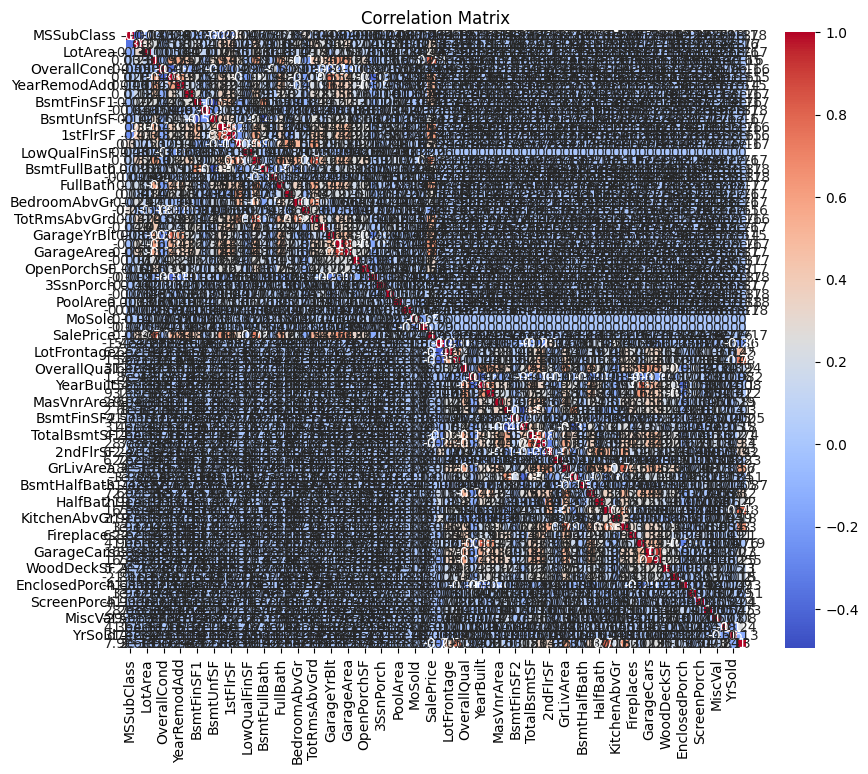

In [4]:
correlation_matrix = data_cleaned.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Training the model

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data1 = pd.read_csv("train.csv", index_col="Id")
data2 = pd.read_csv("test.csv", index_col="Id")

data_filtered = data1[['GrLivArea', 'BedroomAbvGr', 'BsmtFullBath', 'FullBath', 'SalePrice']]

data_filtered['TotalBath'] = data_filtered['BsmtFullBath'] + data_filtered['FullBath']

X = data_filtered[['GrLivArea', 'BedroomAbvGr', 'TotalBath']]  
y = data_filtered['SalePrice']                                   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("R^2 Score:", r2_score(y_test, y_pred))
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {regressor.coef_}")
print(f"Model Intercept: {regressor.intercept_}")


R^2 Score: 0.6541288397141116
Mean Squared Error: 2652944625.051068
Model Coefficients: [    99.68171374 -22761.54054209  30500.11480348]
Model Intercept: 33899.1760412693


C:\Users\PMLS\AppData\Local\Temp\ipykernel_14076\1411855241.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['TotalBath'] = data_filtered['BsmtFullBath'] + data_filtered['FullBath']


Predicting the value of the house based of their sqaurefootage, bedrooms,bathrooms

In [22]:
import pandas as pd


new_data = pd.DataFrame({
    'GrLivArea': [8000],    
    'BedroomAbvGr': [6],   
    'TotalBath': [2]       
})

predicted_price = regressor.predict(new_data)

print(f"The predicted price of the house is: ${predicted_price[0]:,.2f}")


The predicted price of the house is: $755,783.87
